## Cryptocurrency Price Prediction Using Recurrent Neural Networks (RNNs)
The rapid development of cryptocurrencies over the past decade is one of the most controversial and ambiguous innovations in the modern global economy. 

Numerous and unpredictable fluctuations in cryptocurrencies rates, as well as the lack of intelligent and proper management of transactions of this type of currency in most developing countries and users of this type of currency, has led to increased risk and distrust of these roses in investors. 

Capitalists and investors prefer to invest in programs which have the least risk, the most profit and the least time to achieve the main profit. 

Therefore, the issue of developing appropriate methods and models for predicting the price of cryptographic products is essential both for the scientific community and for financial analysts, investors and traders. 

In this project, a deep learning model is used to predict the price of cryptocurrencies. The model uses a Recurrent Neural Networks (RNN) algorithm based on Long Short-Term Memory (LSTM) method to predict the price and others methods.

This will help us to avoid risks or lower it while trading with cryptocurrencies.


## Contents

1. [Importing Dependencies](#Importing-Dependencies)
2. [Dataset Load](#Dataset-Load)
3. [Train and Test Split with Preprocessing](#Train-and-Test-Split-with-Preprocessing)

    3.1 [Split the data](#Split-the-data)
    
    3.2 [Prepare data to neural network](#Prepare-data-to-neural-network)
    

4. [Building The Model](#Building-The-Model)

    4.1 [LSTM model](#LSTM-model)
    
    4.2 [Bidirectional LSTM model](#Bidirectional-LSTM-model)
    
    4.3 [GRU model](#GRU-model)
    

5. [Train The Model](#Train-The-Model)
6. [Model Evaluation](#Model-Evaluation)

    6.1 [Explained variance score](#Explained-variance-score)
    
    6.2 [R² score](#R²-score)
    
    6.3 [Regression analysis](#Regression-analysis)
    

7. [Conclusion](#Conclusion)
8. [Reference](#Reference)

## Importing Dependencies

In [1]:
# First we will import the necessary Library.
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

# For model building we will use these library.
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM, Bidirectional, GRU
from tensorflow.keras.models import Sequential

# For model evaluation we will use these library.
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
import math

## Dataset Load
First we are going to read data from the file using pandas library.

We use Global Crypto Currency Price Database to build our model. 

The Global Crypto Currency Database is a comprehensive and meticulously curated dataset that offers a wealth of information on over 7500 cryptocurrencies, each paired with the US Dollar (USD). 

This dataset is an invaluable resource for anyone interested in exploring the world of digital currencies and analyzing their market behavior. 

These not only include popular coins such as BTC, ETH, and SOL but it also captures newly released coins as well.

In [2]:
# To read files path we need to load metadata file which contain files pith and symbol.
metadata_df = pd.read_csv("Global Crypto Currency Price Database/metadata.csv")
metadata_df.head()

,Coin Pair Name,Coin Pair Symbol,File Path
0,Bitcoin USD,BTC-USD,BTC-USD.csv
1,Ethereum USD,ETH-USD,ETH-USD.csv
2,Tether USDt USD,USDT-USD,USDT-USD.csv
3,BNB USD,BNB-USD,BNB-USD.csv
4,USD Coin USD,USDC-USD,USDC-USD.csv


In [3]:
# Now we will take the files (pith & symbol) and convert it to list.
coin_symbols = metadata_df["Coin Pair Symbol"].to_list()
File_Path =  metadata_df["File Path"].to_list()

Now after we have the listes we are going to loop through the symbols and return the choosing Cryptocurrency piths as list.

And we choose 4 Cryptocurrency which are:
1. Bitcoin Cryptocurrency
2. Ethereum Cryptocurrency
3. Wrapped Bitcoin Cryptocurrency
4. Lido Staked ETH Cryptocurrency

In [4]:
x = 0
file_paths = []
for s in coin_symbols:
    if s == 'BTC-USD' or s == 'ETH-USD' or s == 'WBTC-USD' or s == 'STETH-USD':
        print(f'{coin_symbols[x]} is: {s} and int = {x}')
        file_paths.append(File_Path[x])
    x = x + 1
    
print("---------------------------------")
print(file_paths)

BTC-USD is: BTC-USD and int = 0
ETH-USD is: ETH-USD and int = 1
STETH-USD is: STETH-USD and int = 6
WBTC-USD is: WBTC-USD and int = 17
---------------------------------
['BTC-USD.csv', 'ETH-USD.csv', 'STETH-USD.csv', 'WBTC-USD.csv']


In our case there is no duplicates files piths dut in another case it could happen so for robust code we will remove the duplicates.

In [5]:
# Delete the duplicates files piths.
file_paths = pd.DataFrame(file_paths)
file_paths = file_paths.drop_duplicates()
file_paths = file_paths[0].to_list()
file_paths

['BTC-USD.csv', 'ETH-USD.csv', 'STETH-USD.csv', 'WBTC-USD.csv']

#### **Dataset File Structure**

The Dataset is structured with the following key fields:

1.   **Name**: Coin Name

*   Type: String
*   Description: The official name of the cryptocurrency, enabling easy identification and reference to specific digital coins.



2.   **Symbol**: Trading Symbol of the Coin

*   Type: String
*   Description: This field provides the unique trading symbol associated with each cryptocurrency, a vital element for traders and investors.

3.   **Date**: Date of the Price

*   Type: Datetime
*   Description: Accurate time-stamping allows for precise tracking of cryptocurrency prices, facilitating trend analysis and historical comparisons.

4.   **Open**: Opening Price of the Day

*   Type: Number
*   Description: The opening price signifies the value at which the cryptocurrency began trading on a particular day, offering insights into market sentiment.

5.   **High**: Highest Price of the Day

*   Type: Number
*   Description: The highest price recorded during the day provides a glimpse into the cryptocurrency's peak performance within a given timeframe.

6.   **Low**: Lowest Price of the Day

*   Type: Number
*   Description: The lowest price registered during the day offers a perspective on the cryptocurrency's lowest trading point within that period.

7.   **Close**: Closing Price of the Day

*   Type: Number
*   Description: The closing price represents the cryptocurrency's final trading value for the day, crucial for assessing daily market performance.

8.   **Adj Close**: Adjusted Closing Price of the Day

*   Type: Number
*   Description: This field accounts for various factors such as dividends and stock splits, offering a more accurate view of a cryptocurrency's closing price.


In [6]:
# Read the Cryptocurrency files and concatenate them.
data = pd.concat([pd.read_csv(f'Global Crypto Currency Price Database/data/{file}') for file in file_paths])
data

,Name,Symbol,Date,Open,High,Low,Close,Adj Close,Volume
0,Bitcoin USD,BTC-USD,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,Bitcoin USD,BTC-USD,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,Bitcoin USD,BTC-USD,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,Bitcoin USD,BTC-USD,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,Bitcoin USD,BTC-USD,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...,...,...
1707,Wrapped Bitcoin USD,WBTC-USD,2023-10-03,27546.330078,27616.945312,27285.009766,27354.158203,27354.158203,85545376
1708,Wrapped Bitcoin USD,WBTC-USD,2023-10-04,27422.328125,27758.425781,27272.166016,27758.425781,27758.425781,155344127
1709,Wrapped Bitcoin USD,WBTC-USD,2023-10-05,27751.054688,27784.953125,27648.458984,27654.527344,27654.527344,167894352
1710,Wrapped Bitcoin USD,WBTC-USD,2023-10-06,27410.767578,28098.736328,27313.771484,28055.259766,28055.259766,89669648


In [7]:
# Check if there is any null data.
data.isnull().sum()

Name         0
Symbol       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

**Observation**

No missing values,data is already cleaned.

Datetypes is stored appropriately and 
the data is in correct order

Firstly, out of nine data attributes, we dropped the Adjusted Close, Name, Symbol, Date and Volume attribute and focused on predicting the Close value as the target feature. 

we used a multivariate prediction model by incorporating the Close, Open, High and Low  data attributes.

In [8]:
# Drop attributes
data = data.iloc[:,3:7]
data

,Open,High,Low,Close
0,465.864014,468.174011,452.421997,457.334015
1,456.859985,456.859985,413.104004,424.440002
2,424.102997,427.834991,384.532013,394.795990
3,394.673004,423.295990,389.882996,408.903992
4,408.084991,412.425995,393.181000,398.821014
...,...,...,...,...
1707,27546.330078,27616.945312,27285.009766,27354.158203
1708,27422.328125,27758.425781,27272.166016,27758.425781
1709,27751.054688,27784.953125,27648.458984,27654.527344
1710,27410.767578,28098.736328,27313.771484,28055.259766


We will test the models in each Cryptocurrency and see the result but first we need to load each one in individual so we can make the right train and test set.

In [9]:
# load Cryptocurrencys files individually
BTC_USD = pd.read_csv(f'Global Crypto Currency Price Database/data/{file_paths[0]}')
ETH_USD = pd.read_csv(f'Global Crypto Currency Price Database/data/{file_paths[1]}')
STETH_USD = pd.read_csv(f'Global Crypto Currency Price Database/data/{file_paths[2]}')
WBTC_USD = pd.read_csv(f'Global Crypto Currency Price Database/data/{file_paths[3]}')

In [10]:
# Printing the shape of each Cryptocurrencys
print(f'BTC_USD shape   : {BTC_USD.shape}')
print(f'ETH_USD shape   : {ETH_USD.shape}')
print(f'STETH_USD shape   : {STETH_USD.shape}')
print(f'WBTC_USD shape   : {WBTC_USD.shape}')

BTC_USD shape   : (3308, 9)
ETH_USD shape   : (2159, 9)
STETH_USD shape   : (1019, 9)
WBTC_USD shape   : (1712, 9)


In [11]:
# see the start date and end date for each Cryptocurrencys
print(f"BTC_USD starts date : ({BTC_USD['Date'][0]}) | ends date : ({BTC_USD['Date'][len(BTC_USD) - 1]})")
print(f"ETH_USD starts date : ({ETH_USD['Date'][0]}) | ends date : ({ETH_USD['Date'][len(ETH_USD) - 1]})")
print(f"STETH_USD starts date : ({STETH_USD['Date'][0]}) | ends date : ({STETH_USD['Date'][len(STETH_USD) - 1]})")
print(f"WBTC_USD starts date : ({WBTC_USD['Date'][0]}) | ends date : ({WBTC_USD['Date'][len(WBTC_USD) - 1]})")

BTC_USD starts date : (2014-09-17) | ends date : (2023-10-07)
ETH_USD starts date : (2017-11-09) | ends date : (2023-10-07)
STETH_USD starts date : (2020-12-23) | ends date : (2023-10-07)
WBTC_USD starts date : (2019-01-30) | ends date : (2023-10-07)


In [12]:
# Convert the date column from string to datetime so we can split the dataset to train and test sets.
BTC_USD["Date"] = pd.to_datetime(BTC_USD["Date"], format="%Y-%m-%d")
ETH_USD["Date"] = pd.to_datetime(ETH_USD["Date"], format="%Y-%m-%d")
STETH_USD["Date"] = pd.to_datetime(STETH_USD["Date"], format="%Y-%m-%d")
WBTC_USD["Date"] = pd.to_datetime(WBTC_USD["Date"], format="%Y-%m-%d")

## Train and Test Split with Preprocessing

### Split the data

We need to split data into train and test sets. 

The test set start from date 2023-01-01 to 2023-10-07 which is about 10% of the data.

And the train set contains all data before 2023-01-01 which is about 90% of the data.

In [13]:
# Split the data to test sets.
BTC_USD_test = BTC_USD.loc[(BTC_USD['Date'] >= '2023-01-01')]
ETH_USD_test = ETH_USD.loc[(ETH_USD['Date'] >= '2023-01-01')]
STETH_USD_test = STETH_USD.loc[(STETH_USD['Date'] >= '2023-01-01')]
WBTC_USD_test = WBTC_USD.loc[(WBTC_USD['Date'] >= '2023-01-01')]

In [14]:
# Print the shape of every Cryptocurrencies test sets.
print(f'BTC_USD_test shape   : {BTC_USD_test.shape}')
print(f'ETH_USD_test shape   : {ETH_USD_test.shape}')
print(f'STETH_USD_test shape   : {STETH_USD_test.shape}')
print(f'WBTC_USD_test shape   : {WBTC_USD_test.shape}')

BTC_USD_test shape   : (280, 9)
ETH_USD_test shape   : (280, 9)
STETH_USD_test shape   : (280, 9)
WBTC_USD_test shape   : (280, 9)


In [15]:
# Split the data to train sets.
BTC_USD_train = BTC_USD.loc[(BTC_USD['Date'] < '2023-01-01')]
ETH_USD_train = ETH_USD.loc[(ETH_USD['Date'] < '2023-01-01')]
STETH_USD_train = STETH_USD.loc[(STETH_USD['Date'] < '2023-01-01')]
WBTC_USD_train = WBTC_USD.loc[(WBTC_USD['Date'] < '2023-01-01')]

In [16]:
# Print the shape of every Cryptocurrencies train sets.
print(f'BTC_USD_train shape   : {BTC_USD_train.shape}')
print(f'ETH_USD_train shape   : {ETH_USD_train.shape}')
print(f'STETH_USD_train shape   : {STETH_USD_train.shape}')
print(f'WBTC_USD_train shape   : {WBTC_USD_train.shape}')

BTC_USD_train shape   : (3028, 9)
ETH_USD_train shape   : (1879, 9)
STETH_USD_train shape   : (739, 9)
WBTC_USD_train shape   : (1432, 9)


In [17]:
# Drop an unused attributes.
BTC_USD_test = BTC_USD_test.iloc[:,3:7]
ETH_USD_test = ETH_USD_test.iloc[:,3:7]
STETH_USD_test = STETH_USD_test.iloc[:,3:7]
WBTC_USD_test = WBTC_USD_test.iloc[:,3:7]

In [18]:
# Print the shape of every Cryptocurrencies test sets.
print(f'BTC_USD_test shape   : {BTC_USD_test.shape}')
print(f'ETH_USD_test shape   : {ETH_USD_test.shape}')
print(f'STETH_USD_test shape   : {STETH_USD_test.shape}')
print(f'WBTC_USD_test shape   : {WBTC_USD_test.shape}')

BTC_USD_test shape   : (280, 4)
ETH_USD_test shape   : (280, 4)
STETH_USD_test shape   : (280, 4)
WBTC_USD_test shape   : (280, 4)


In [19]:
# Drop an unused attributes.
BTC_USD_train = BTC_USD_train.iloc[:,3:7]
ETH_USD_train = ETH_USD_train.iloc[:,3:7]
STETH_USD_train = STETH_USD_train.iloc[:,3:7]
WBTC_USD_train = WBTC_USD_train.iloc[:,3:7]

In [20]:
# Print the shape of every Cryptocurrencies train sets.
print(f'BTC_USD_train shape   : {BTC_USD_train.shape}')
print(f'ETH_USD_train shape   : {ETH_USD_train.shape}')
print(f'STETH_USD_train shape   : {STETH_USD_train.shape}')
print(f'WBTC_USD_train shape   : {WBTC_USD_train.shape}')

BTC_USD_train shape   : (3028, 4)
ETH_USD_train shape   : (1879, 4)
STETH_USD_train shape   : (739, 4)
WBTC_USD_train shape   : (1432, 4)


### **Prepare data** to neural network

**Normalizing Data**

*  Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information.

*  MinMaxScaler. For each value in a feature, MinMaxScaler subtracts the minimum value in the feature and then divides by the range. The range is the difference between the original maximum and original minimum. MinMaxScaler preserves the shape of the original distribution.

In [21]:
# initialize the scaler and fed it with all data
scaler = MinMaxScaler(feature_range=(0,1))
scaler = scaler.fit(data)

In [22]:
# Normalizing test sets by scaling them between 0 and 1.
BTC_USD_test = scaler.transform(BTC_USD_test)
ETH_USD_test = scaler.transform(ETH_USD_test)
STETH_USD_test = scaler.transform(STETH_USD_test)
WBTC_USD_test = scaler.transform(WBTC_USD_test)

In [23]:
# Normalizing train sets by scaling them between 0 and 1.
BTC_USD_train = scaler.transform(BTC_USD_train)
ETH_USD_train = scaler.transform(ETH_USD_train)
STETH_USD_train = scaler.transform(STETH_USD_train)
WBTC_USD_train = scaler.transform(WBTC_USD_train)

**Prepare data**

Now we are going to choose a number for prediction days the prediction days are going to be the number of days that we are going to base our prediction on so the idea of this whole script is that we look at the past x days for example 60 or 90 and we predict one day in the future so we look at 60 days and then we predict the 61st day for example.

If we use 10 days it is going to be more actual data or more recent data but if you base it on 60 days it is going to be a little bit more conservative.

We use 60 days so we want to show the neural network 60 days and it has to predict 61st day.

And then we need to have x_train data and y_train data, y_train is going to be the label or result and x_train is going to be the 60 days befores.

In [24]:
# Select number of prediction days.
prediction_days = 60

x_train, y_train = [], []

# Prepare BTC to x_train and y_train.
for x in range(prediction_days, len(BTC_USD_train)):
    x_train.append(BTC_USD_train[x-prediction_days:x, :])
    y_train.append(BTC_USD_train[x, -1])

# Prepare ETH to x_train and y_train.    
for x in range(prediction_days, len(ETH_USD_train)):
    x_train.append(ETH_USD_train[x-prediction_days:x, :])
    y_train.append(ETH_USD_train[x, -1])

# Prepare STETH to x_train and y_train.    
for x in range(prediction_days, len(STETH_USD_train)):
    x_train.append(STETH_USD_train[x-prediction_days:x, :])
    y_train.append(STETH_USD_train[x, -1])   

# Prepare WBTC to x_train and y_train.    
for x in range(prediction_days, len(WBTC_USD_train)):
    x_train.append(WBTC_USD_train[x-prediction_days:x, :])
    y_train.append(WBTC_USD_train[x, -1])   

# Turning it into numpy array.   
x_train, y_train = np.array(x_train), np.array(y_train)

In [25]:
# Print the shape of the x_train & y_train.
print(x_train.shape) 
print(y_train.shape) 

(6838, 60, 4)
(6838,)


In [26]:
# Reshape y_train.
y_train=np.reshape(y_train,(len(y_train),1))
print(y_train.shape) 

(6838, 1)


Now we need to have x_test data and y_test data, y_test is going to be the label or result and x_test is going to be the 60 days befores.

also x & y for every Cryptocurrencies test sets.

In [27]:
x_test, y_test = [], []

x_BTC_USD_test, y_BTC_USD_test = [], []
x_ETH_USD_test, y_ETH_USD_test = [], []
x_STETH_USD_test, y_STETH_USD_test = [], []
x_WBTC_USD_test, y_WBTC_USD_test = [], []

# Prepare BTC to x test and y test.
for x in range(prediction_days, len(BTC_USD_test)):
    x_test.append(BTC_USD_test[x-prediction_days:x, :])
    y_test.append(BTC_USD_test[x, -1])
    x_BTC_USD_test.append(BTC_USD_test[x-prediction_days:x, :])
    y_BTC_USD_test.append(BTC_USD_test[x, -1])

# Prepare ETH to x test and y test.    
for x in range(prediction_days, len(ETH_USD_test)):
    x_test.append(ETH_USD_test[x-prediction_days:x, :])
    y_test.append(ETH_USD_test[x, -1])
    x_ETH_USD_test.append(ETH_USD_test[x-prediction_days:x, :])
    y_ETH_USD_test.append(ETH_USD_test[x, -1])

# Prepare STETH to x test and y test.    
for x in range(prediction_days, len(STETH_USD_test)):
    x_test.append(STETH_USD_test[x-prediction_days:x, :])
    y_test.append(STETH_USD_test[x, -1])  
    x_STETH_USD_test.append(STETH_USD_test[x-prediction_days:x, :])
    y_STETH_USD_test.append(STETH_USD_test[x, -1])

# Prepare WBTC to x test and y test.    
for x in range(prediction_days, len(WBTC_USD_test)):
    x_test.append(WBTC_USD_test[x-prediction_days:x, :])
    y_test.append(WBTC_USD_test[x, -1])  
    x_WBTC_USD_test.append(WBTC_USD_test[x-prediction_days:x, :])
    y_WBTC_USD_test.append(WBTC_USD_test[x, -1])

# Turning it into numpy array.       
x_test, y_test = np.array(x_test), np.array(y_test)
x_BTC_USD_test, y_BTC_USD_test = np.array(x_BTC_USD_test), np.array(y_BTC_USD_test)
x_ETH_USD_test, y_ETH_USD_test = np.array(x_ETH_USD_test), np.array(y_ETH_USD_test)
x_STETH_USD_test, y_STETH_USD_test = np.array(x_STETH_USD_test), np.array(y_STETH_USD_test)
x_WBTC_USD_test, y_WBTC_USD_test = np.array(x_WBTC_USD_test), np.array(y_WBTC_USD_test)

In [28]:
# Print the x & y test sets.
print(f'x_test shape           : {x_test.shape}')
print(f'x_BTC_USD_test shape   : {x_BTC_USD_test.shape}')
print(f'x_ETH_USD_test shape   : {x_ETH_USD_test.shape}')
print(f'x_STETH_USD_test shape : {x_STETH_USD_test.shape}')
print(f'x_WBTC_USD_test shape  : {x_WBTC_USD_test.shape}')

x_test shape          : (880, 60, 4)
x_BTC_USD_test shape  : (220, 60, 4)
x_ETH_USD_test shape  : (220, 60, 4)
x_STETH_USD_test shape  : (220, 60, 4)
x_WBTC_USD_test shape  : (220, 60, 4)


In [29]:
# Reshape y test sets and print their shapes.
y_test=np.reshape(y_test,(len(y_test),1))
y_BTC_USD_test=np.reshape(y_BTC_USD_test,(len(y_BTC_USD_test),1))
y_ETH_USD_test=np.reshape(y_ETH_USD_test,(len(y_ETH_USD_test),1))
y_STETH_USD_test=np.reshape(y_STETH_USD_test,(len(y_STETH_USD_test),1))
y_WBTC_USD_test=np.reshape(y_WBTC_USD_test,(len(y_WBTC_USD_test),1))
print(f'y_test shape          : {y_test.shape}')
print(f'y_BTC_USD_test shape  : {y_BTC_USD_test.shape}')
print(f'y_ETH_USD_test shape  : {y_ETH_USD_test.shape}')
print(f'y_STETH_USD_test shape  : {y_STETH_USD_test.shape}')
print(f'y_WBTC_USD_test shape  : {y_WBTC_USD_test.shape}')

y_test shape          : (880, 1)
y_BTC_USD_test shape  : (220, 1)
y_ETH_USD_test shape  : (220, 1)
y_STETH_USD_test shape  : (220, 1)
y_WBTC_USD_test shape  : (220, 1)


## Building The Model
**Neural networks** are artificial systems that were inspired by biological neural networks. These systems learn to perform tasks by being exposed to various datasets and examples without any task-specific rules. The idea is that the system generates identifying characteristics from the data they have been passed without being programmed with a pre-programmed understanding of these datasets. Neural networks are based on computational models for threshold logic. Threshold logic is a combination of algorithms and mathematics.

**Recurrent Neural Network(RNN)** is a type of Neural Network where the output from the previous step is fed as input to the current step. In traditional neural networks, all the inputs and outputs are independent of each other, but in cases when it is required to predict the next word of a sentence, the previous words are required and hence there is a need to remember the previous words. Thus RNN came into existence, which solved this issue with the help of a Hidden Layer. The main and most important feature of RNN is its Hidden state, which remembers some information about a sequence. The state is also referred to as Memory State since it remembers the previous input to the network. It uses the same parameters for each input as it performs the same task on all the inputs or hidden layers to produce the output. This reduces the complexity of parameters, unlike other neural networks.



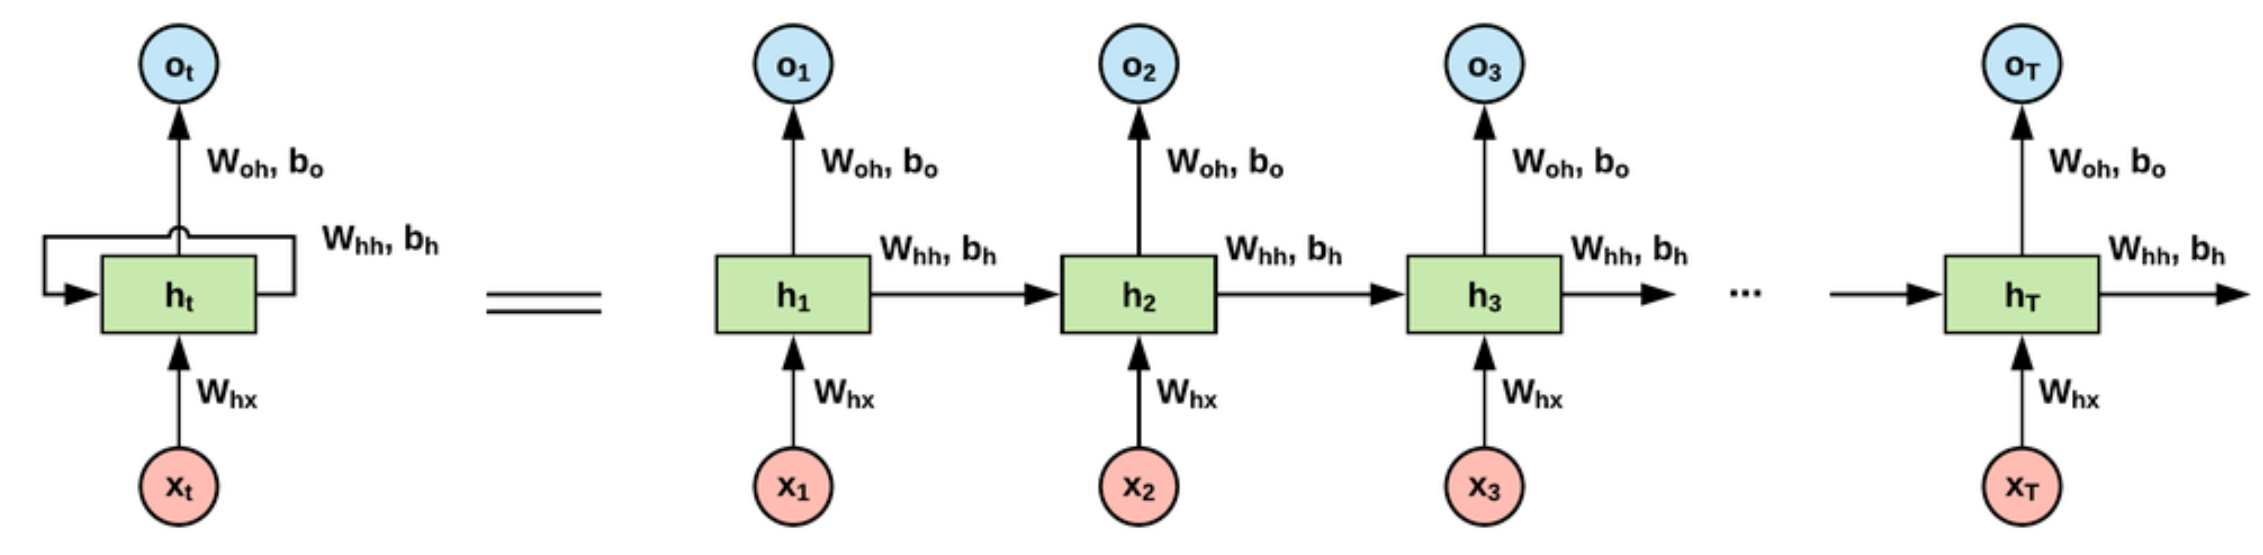
$$Recurrent Neural Network(RNN)$$

The recurrent neural networks (RNNs) can keep past information by taking previous layers’ output as input for the next layer in the networks. However, it cannot learn a too-long memory contained in the networks and suffers the long-term dependency problem. Therefore, a special type of RNNs was introduced by Hochreiter and Schmidhuber that could solve the problem. Later, the proposed method was called the long short-term memory (LSTM) model and was widely used in various applications, including solving regression tasks, such as time series prediction.

In this project we will use 3 models and see which one is the best. <br> **Models are:**
1. LSTM
2. Bi directional LSTM
3. GRU

The reason for choosing these models are that they store information for a longer period of time and they has been so designed that the vanishing gradient problem is almost completely removed, while the training model is left unaltered.

### LSTM model
LSTM networks are an extension of recurrent neural networks (RNNs) mainly introduced to handle situations where RNNs fail.
* It fails to store information for a longer period of time. At times, a reference to certain information stored quite a long time ago is required to predict the current output. But RNNs are absolutely incapable of handling such “long-term dependencies”.
* There is no finer control over which part of the context needs to be carried forward and how much of the past needs to be ‘forgotten’. 
* Other issues with RNNs are exploding and vanishing gradients which occur during the training process of a network through backtracking. 

Thus, Long Short-Term Memory (LSTM) was brought into the picture. It has been so designed that the vanishing gradient problem is almost completely removed, while the training model is left unaltered. Long-time lags in certain problems are bridged using LSTMs which also handle noise, distributed representations, and continuous values. LSTMs provide us with a large range of parameters such as learning rates, and input and output biases.

The basic difference between the architectures of RNNs and LSTMs is that the hidden layer of LSTM is a gated unit or gated cell. It consists of four layers that interact with one another in a way to produce the output of that cell along with the cell state. These two things are then passed onto the next hidden layer. Unlike RNNs which have got only a single neural net layer of tanh, LSTMs comprise three logistic sigmoid gates and one tanh layer. Gates have been introduced in order to limit the information that is passed through the cell. They determine which part of the information will be needed by the next cell and which part is to be discarded. The output is usually in the range of 0-1 where ‘0’ means ‘reject all’ and ‘1’ means ‘include all’. 

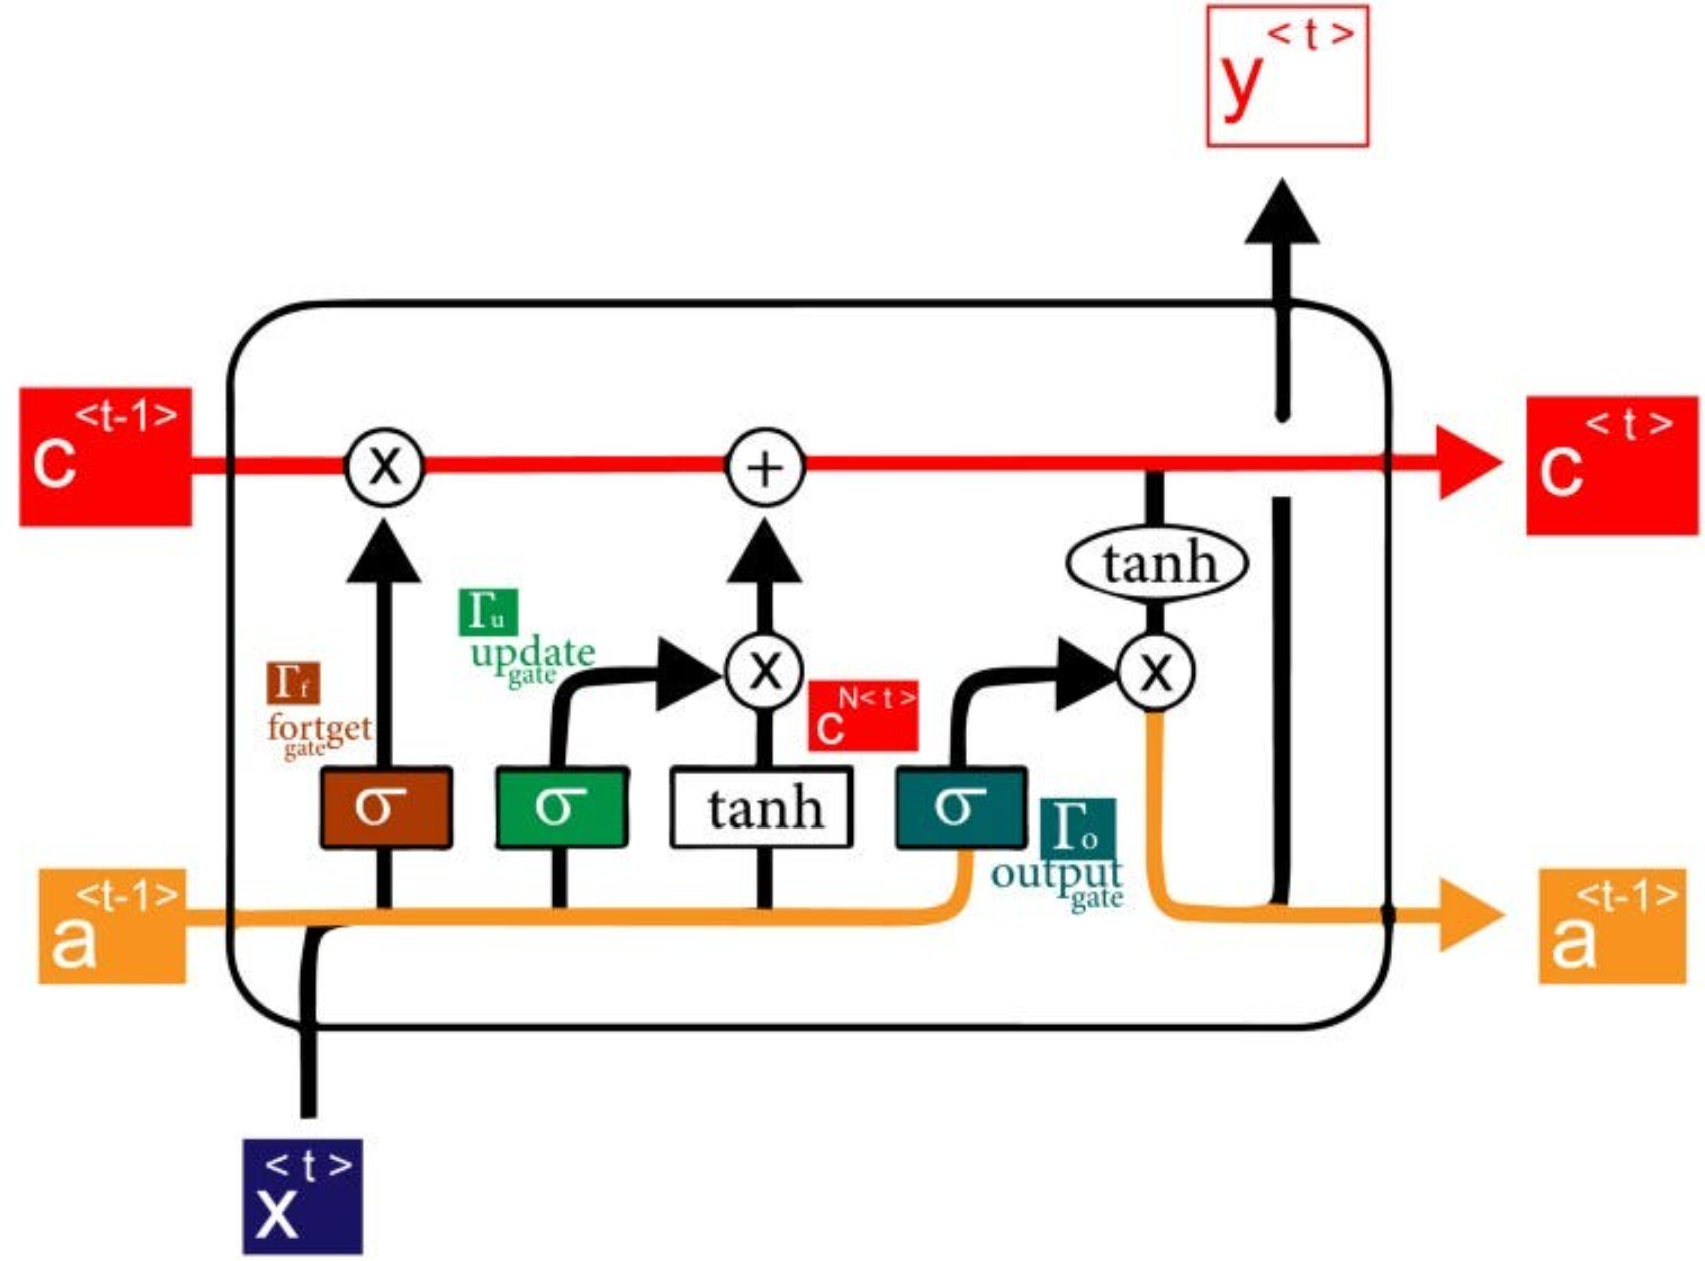
$$LSTM$$

**Forget gate**

First, we have the forget gate. This gate decides what information should be thrown away or kept. Information from the previous hidden state and information from the current input is passed through the sigmoid function. Values come out between 0 and 1. The closer to 0 means to forget, and the closer to 1 means to keep.

**Update gate**

To update the cell state, we have the input gate. First, we pass the previous hidden state and current input into a sigmoid function. That decides which values will be updated by transforming the values to be between 0 and 1. 0 means not important, and 1 means important. You also pass the hidden state and current input into the tanh function to squish values between -1 and 1 to help regulate the network. Then you multiply the tanh output with the sigmoid output. The sigmoid output will decide which information is important to keep from the tanh output.

**Cell State**

Now we should have enough information to calculate the cell state. First, the cell state gets pointwise multiplied by the forget vector. This has a possibility of dropping values in the cell state if it gets multiplied by values near 0. Then we take the output from the input gate and do a pointwise addition which updates the cell state to new values that the neural network finds relevant. That gives us our new cell state.

**Output gate**

Last we have the output gate. The output gate decides what the next hidden state should be. Remember that the hidden state contains information on previous inputs. The hidden state is also used for predictions. First, we pass the previous hidden state and the current input into a sigmoid function. Then we pass the newly modified cell state to the tanh function. We multiply the tanh output with the sigmoid output to decide what information the hidden state should carry. The output is the hidden state. The new cell state and the new hidden is then carried over to the next time step.

For model architecture, we use 
* 3 LSTM layers with 100 units.
* deopout layer of 20% of the units.
* finaly dense layer with 1 unit for prediction.

In [30]:
model = Sequential([
    LSTM(units=100, return_sequences=True, input_shape=(x_train.shape[1], 4)),
    #Dropout(0.1),
    LSTM(units=100, return_sequences=True),
    #Dropout(0.1),
    LSTM(units=100),
    Dropout(0.2),
    Dense(units=1)
])
# Compile the model using the Adam optimizer and mean squared error as loss.
model.compile(optimizer='adam', loss='mean_squared_error')

In [31]:
# model summary.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           42000     
                                                                 
 lstm_1 (LSTM)               (None, 60, 100)           80400     
                                                                 
 lstm_2 (LSTM)               (None, 100)               80400     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 202,901
Trainable params: 202,901
Non-trainable params: 0
_________________________________________________________________


### Bidirectional LSTM model
Bidirectional LSTM or BiLSTM is a term used for a sequence model which contains two LSTM layers, one for processing input in the forward direction and the other for processing in the backward direction. The intuition behind this approach is that by processing data in both directions, the model is able to better understand the relationship between sequences (e.g. knowing the following and preceding words in a sentence).

To better understand this let us see an example. The first statement is “Server can you bring me this dish” and the second statement is “He crashed the server”. In both these statements, the word server has different meanings and this relationship depends on the following and preceding words in the statement. The bidirectional LSTM helps the machine to understand this relationship better than compared with unidirectional LSTM.

**Architecture**

The architecture of bidirectional LSTM comprises of two unidirectional LSTMs which process the sequence in both forward and backward directions. This architecture can be interpreted as having two separate LSTM networks, one gets the sequence of tokens as it is while the other gets in the reverse order. Both of these LSTM network returns a probability vector as output and the final output is the combination of both of these probabilities. It can be represented as:

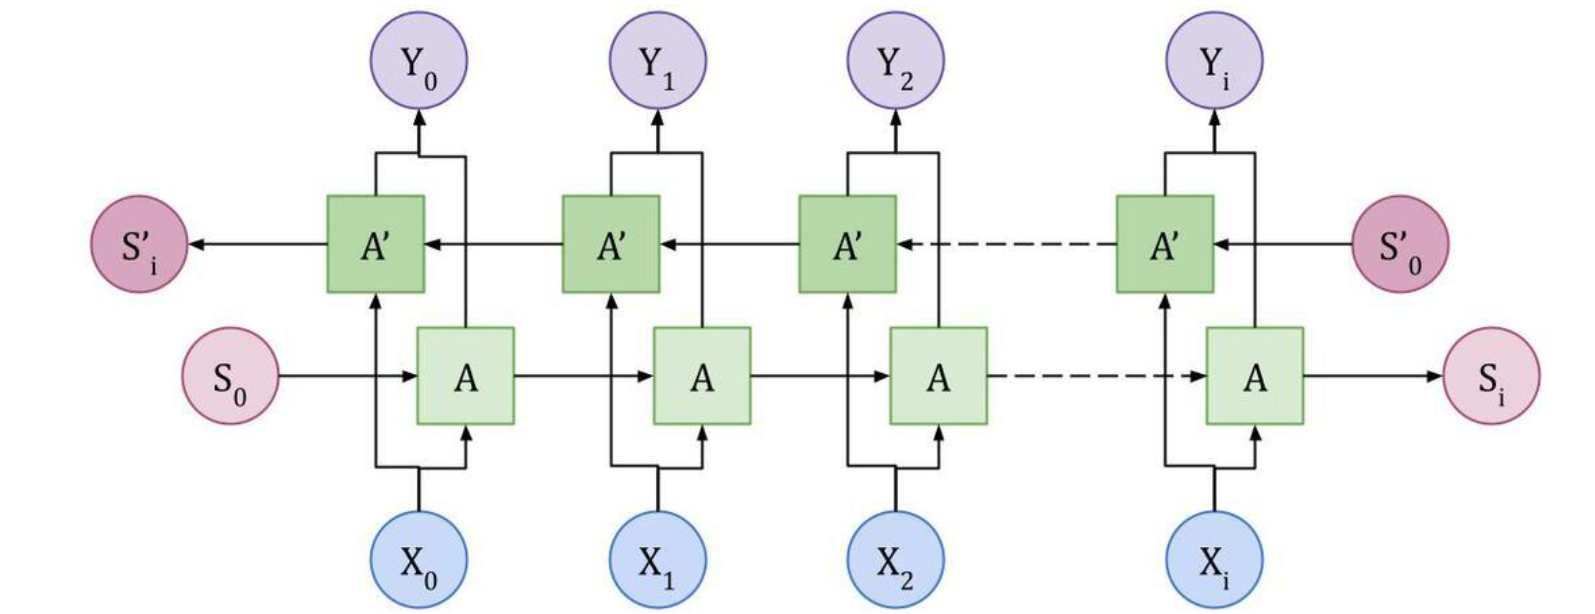
$$Bidirectional LSTM$$

Figure above describes the architecture of the BiLSTM layer where X_i    is the input , Y_i    is the output , and A    and A'    are LSTM nodes. The final output of Y_i    is the combination of A    and A'    LSTM nodes.

For model architecture, we use 
* 3 BiLSTM layers with 100 units.
* deopout layer of 20% of the units.
* finaly dense layer with 1 unit for prediction.

In [32]:
model2 = Sequential([
    Bidirectional(LSTM(units=100, return_sequences=True, input_shape=(x_train.shape[1], 4)), merge_mode='concat'),
    #Dropout(0.1),
    Bidirectional(LSTM(units=100, return_sequences=True), merge_mode='concat'),
    #Dropout(0.1),
    Bidirectional(LSTM(units=100), merge_mode='concat'),
    Dropout(0.2),
    Dense(units=1)
])
# Compile the model using the Adam optimizer and mean squared error as loss.
model2.compile(optimizer='adam', loss='mean_squared_error')

In [33]:
# building the model.
model2.build(input_shape=(x_train.shape[0], x_train.shape[1], 4))
# model summary.
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (6838, 60, 200)          84000     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (6838, 60, 200)          240800    
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (6838, 200)              240800    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (6838, 200)               0         
                                                                 
 dense_1 (Dense)             (6838, 1)                 201       
                                                      

### GRU model
The GRU is the newer generation of Recurrent Neural networks and is pretty similar to an LSTM. GRU’s got rid of the cell state and used the hidden state to transfer information. It also only has two gates, a reset gate and update gate.

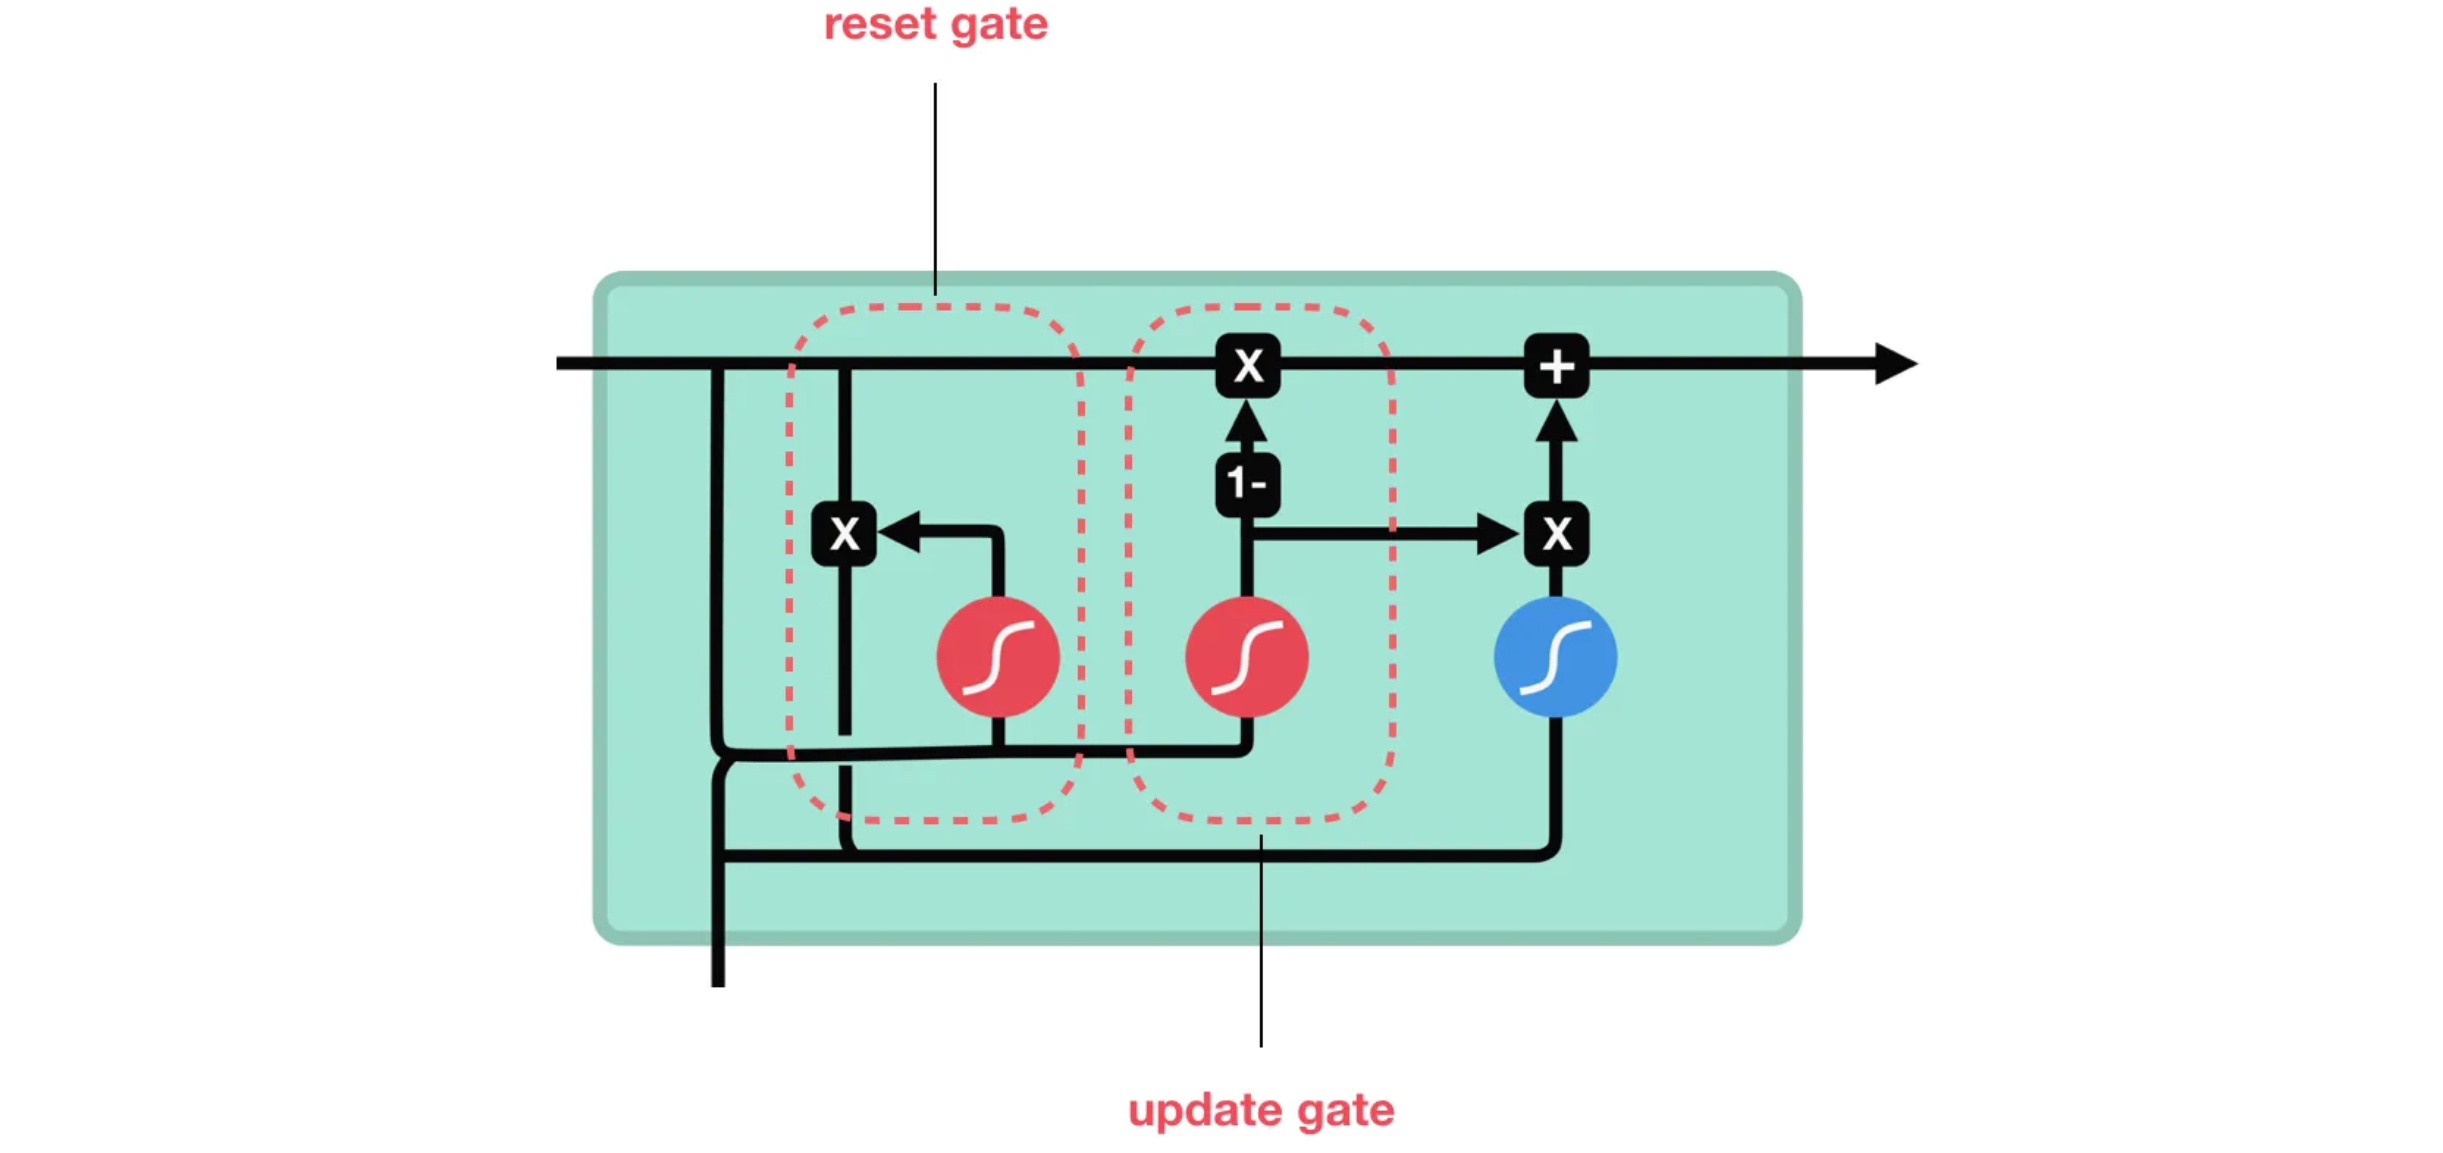
$$GRU$$

**Update Gate**

The update gate acts similar to the forget and Update gate of an LSTM. It decides what information to throw away and what new information to add.

**Reset Gate**

The reset gate is another gate is used to decide how much past information to forget.

And that’s a GRU. GRU’s has fewer tensor operations; therefore, they are a little speedier to train then LSTM’s. There isn’t a clear winner which one is better. Researchers and engineers usually try both to determine which one works better for their use case.

For model architecture, we use 
* 3 GRU layers with 100 units.
* deopout layer of 20% of the units.
* finaly dense layer with 1 unit for prediction.

In [34]:
model3 = Sequential([
    GRU(units=100, return_sequences=True, input_shape=(x_train.shape[1], 4)),
    #Dropout(0.1),
    GRU(units=100, return_sequences=True),
    #Dropout(0.1),
    GRU(units=100),
    Dropout(0.2),
    Dense(units=1)
])
# Compile the model using the Adam optimizer and mean squared error as loss.
model3.compile(optimizer='adam', loss='mean_squared_error')

In [35]:
# model summary.
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 60, 100)           31800     
                                                                 
 gru_1 (GRU)                 (None, 60, 100)           60600     
                                                                 
 gru_2 (GRU)                 (None, 100)               60600     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 153,101
Trainable params: 153,101
Non-trainable params: 0
_________________________________________________________________


## Train The Model
Now let's train our models on 300 epoch with batch size 1024 and lets make the shuffle equal to True so each batch will shuffled.

In [36]:
history = model.fit(x=x_train, y=y_train, validation_data=(x_test,y_test), batch_size=1024, epochs=300, shuffle=True)

Epoch 1/300
7/7 [==============================] - 13s 922ms/step - loss: 0.0226 - val_loss: 0.0082
Epoch 2/300
7/7 [==============================] - 5s 802ms/step - loss: 0.0060 - val_loss: 0.0054
Epoch 3/300
7/7 [==============================] - 5s 653ms/step - loss: 0.0027 - val_loss: 0.0012
Epoch 4/300
7/7 [==============================] - 5s 748ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 5/300
7/7 [==============================] - 4s 636ms/step - loss: 0.0016 - val_loss: 3.7184e-04
Epoch 6/300
7/7 [==============================] - 5s 666ms/step - loss: 0.0015 - val_loss: 8.5045e-04
Epoch 7/300
7/7 [==============================] - 4s 630ms/step - loss: 0.0013 - val_loss: 2.8845e-04
Epoch 8/300
7/7 [==============================] - 4s 614ms/step - loss: 0.0013 - val_loss: 4.7742e-04
Epoch 9/300
7/7 [==============================] - 5s 703ms/step - loss: 0.0013 - val_loss: 2.7140e-04
Epoch 10/300
7/7 [==============================] - 7s 994ms/step - loss: 0.0011 - val_l

In [37]:
history2 = model2.fit(x=x_train, y=y_train, validation_data=(x_test,y_test), batch_size=1024, epochs=300, shuffle=True)

Epoch 1/300
7/7 [==============================] - 28s 2s/step - loss: 0.0242 - val_loss: 0.0121
Epoch 2/300
7/7 [==============================] - 11s 2s/step - loss: 0.0069 - val_loss: 0.0057
Epoch 3/300
7/7 [==============================] - 11s 2s/step - loss: 0.0038 - val_loss: 0.0018
Epoch 4/300
7/7 [==============================] - 12s 2s/step - loss: 0.0028 - val_loss: 0.0020
Epoch 5/300
7/7 [==============================] - 11s 2s/step - loss: 0.0020 - val_loss: 4.0269e-04
Epoch 6/300
7/7 [==============================] - 11s 2s/step - loss: 0.0015 - val_loss: 7.2172e-04
Epoch 7/300
7/7 [==============================] - 11s 2s/step - loss: 0.0014 - val_loss: 2.1349e-04
Epoch 8/300
7/7 [==============================] - 12s 2s/step - loss: 9.9358e-04 - val_loss: 2.0215e-04
Epoch 9/300
7/7 [==============================] - 11s 2s/step - loss: 9.2957e-04 - val_loss: 2.1895e-04
Epoch 10/300
7/7 [==============================] - 11s 2s/step - loss: 8.8697e-04 - val_loss: 2.21

In [38]:
history3 = model3.fit(x=x_train, y=y_train, validation_data=(x_test,y_test), batch_size=1024, epochs=300, shuffle=True)

Epoch 1/300
7/7 [==============================] - 13s 860ms/step - loss: 0.0350 - val_loss: 4.9640e-04
Epoch 2/300
7/7 [==============================] - 4s 565ms/step - loss: 0.0057 - val_loss: 9.1301e-04
Epoch 3/300
7/7 [==============================] - 5s 678ms/step - loss: 0.0027 - val_loss: 4.9844e-04
Epoch 4/300
7/7 [==============================] - 5s 662ms/step - loss: 0.0016 - val_loss: 6.8987e-04
Epoch 5/300
7/7 [==============================] - 4s 621ms/step - loss: 0.0013 - val_loss: 6.8414e-04
Epoch 6/300
7/7 [==============================] - 4s 646ms/step - loss: 9.9018e-04 - val_loss: 4.4839e-04
Epoch 7/300
7/7 [==============================] - 5s 702ms/step - loss: 9.6657e-04 - val_loss: 3.1863e-04
Epoch 8/300
7/7 [==============================] - 5s 641ms/step - loss: 8.4533e-04 - val_loss: 1.5703e-04
Epoch 9/300
7/7 [==============================] - 4s 637ms/step - loss: 7.6677e-04 - val_loss: 1.5254e-04
Epoch 10/300
7/7 [==============================] - 5s 7

## Model Evaluation
Now that we have trained the model, we can evaluate its performance. We will some evaluation metrics and techniques to test the model.

Let's start with the Learning Curve of loss of the model on each epoch.

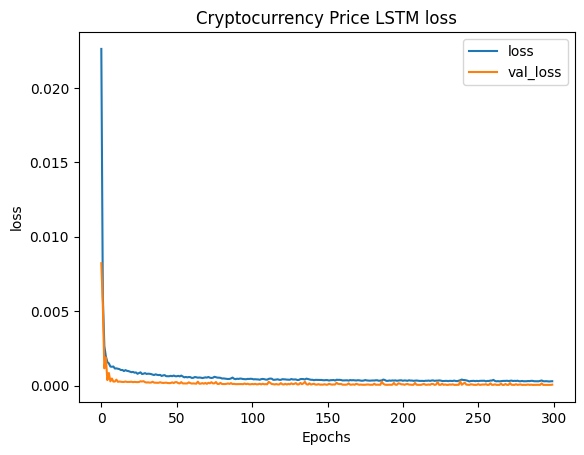

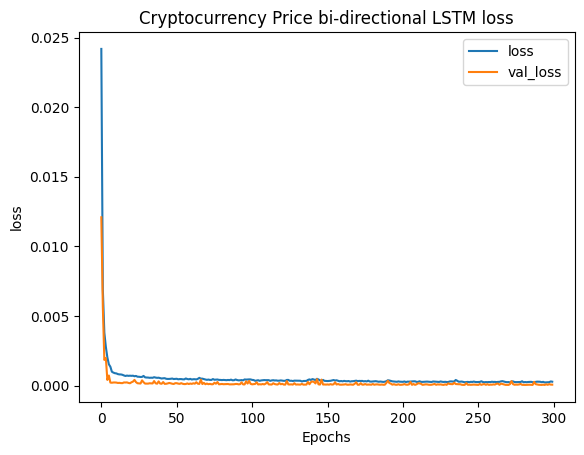

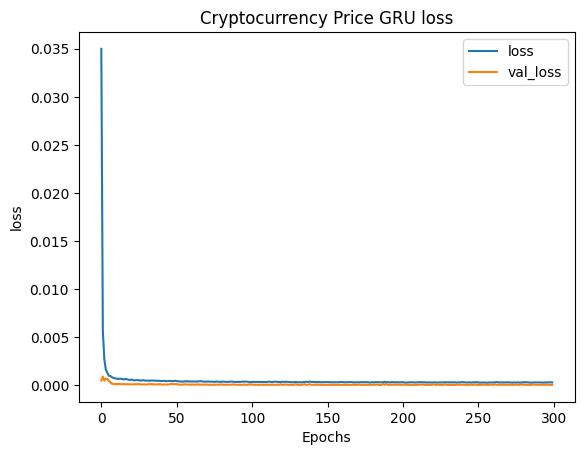

In [39]:
def plot_graphs(history, string, model_name):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.title(f'Cryptocurrency Price {model_name} {string}')
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
    
plot_graphs(history, "loss", "LSTM")
plot_graphs(history2, "loss", "bi-directional LSTM")
plot_graphs(history3, "loss", "GRU")

good result and seems to have no overfitting or underfitting.

In [40]:
# to save our models.
model.save('m1.h5')
model2.save('m2.h5')
model3.save('m3.h5')

In [108]:
# function to predict and return the values of prices to the original one.
def predict(x, y, m):
    prediction_prices = m.predict(x)
    prediction_prices_copies = np.repeat(prediction_prices, x_train.shape[2], axis=1)
    prediction_prices = scaler.inverse_transform(prediction_prices_copies)[:,0]
    actual_prices_copies = np.repeat(y, x_train.shape[2], axis=1)
    actual_price = scaler.inverse_transform(actual_prices_copies)[:,0]
    return prediction_prices, actual_price

In [109]:
# function to plot the diagram of actual price and predicted one.
def print_diagram(actual_price, prediction_prices, string, model_name):
    plt.plot(actual_price, color='black', label='Actual Price')
    plt.plot(prediction_prices, color='green', label='Prediction Prices')
    plt.title(f'Cryptocurrency Price {string} {model_name}')
    plt.xlabel('day')
    plt.ylabel('Price')
    plt.legend(loc='upper right')
    plt.show()

In [110]:
# Main function which take a model and their name and then predict and plot a diagram for each Cryptocurrencies test sets.
def main(MODEL, model_name):
    prediction_prices, actual_price = predict(x_BTC_USD_test, y_BTC_USD_test, MODEL)
    print_diagram(prediction_prices, actual_price, "BTC-USD", model_name)
    prediction_prices, actual_price = predict(x_ETH_USD_test, y_ETH_USD_test, MODEL)
    print_diagram(prediction_prices, actual_price, "ETH-USD", model_name)
    prediction_prices, actual_price = predict(x_STETH_USD_test, y_STETH_USD_test, MODEL)
    print_diagram(prediction_prices, actual_price, "STETH-USD", model_name)
    prediction_prices, actual_price = predict(x_WBTC_USD_test, y_WBTC_USD_test, MODEL)
    print_diagram(prediction_prices, actual_price, "WBTC-USD", model_name)

Let's see some prediction.

In [111]:
# function to see prediction on tese set for models.
def main_2(MODEL, model_name):
    # predict on test set using chosen model.
    y_pred = MODEL.predict(x_test)

    # Show the first 10 and comberat with the original.
    for i in range(10):
        print(y_pred[i], y_test[i])
        
    # plot the diagram of actual test values price and predicted one.
    plt.figure(figsize=(16,8))
    plt.plot(y_test, color = 'black', label = 'Test')
    plt.plot(y_pred, color = 'green', label = 'pred')
    plt.title(f'Cryptocurrency Price {model_name} model for test set')
    plt.legend()
    plt.show()

28/28 [==============================] - 1s 31ms/step
[0.3521275] [0.34662545]
[0.352594] [0.33013544]
[0.3423229] [0.32999718]
[0.33589697] [0.33121474]
[0.33497697] [0.33112945]
[0.33578485] [0.3280177]
[0.3343863] [0.32058334]
[0.3294501] [0.3005032]
[0.31436908] [0.29789842]
[0.30302942] [0.30449518]


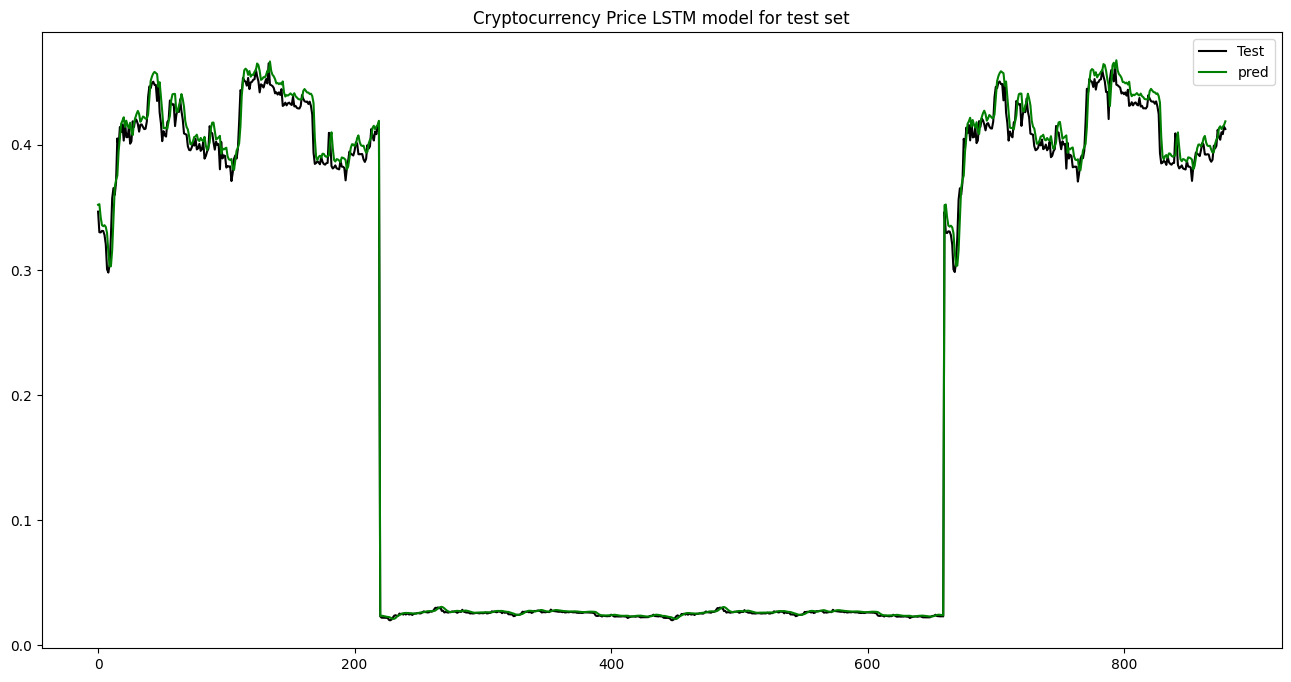

In [127]:
main_2(model, "LSTM")

28/28 [==============================] - 1s 51ms/step
[0.3413162] [0.34662545]
[0.3406273] [0.33013544]
[0.32841825] [0.32999718]
[0.32612693] [0.33121474]
[0.32597196] [0.33112945]
[0.3258829] [0.3280177]
[0.32366502] [0.32058334]
[0.31805968] [0.3005032]
[0.3014583] [0.29789842]
[0.29524916] [0.30449518]


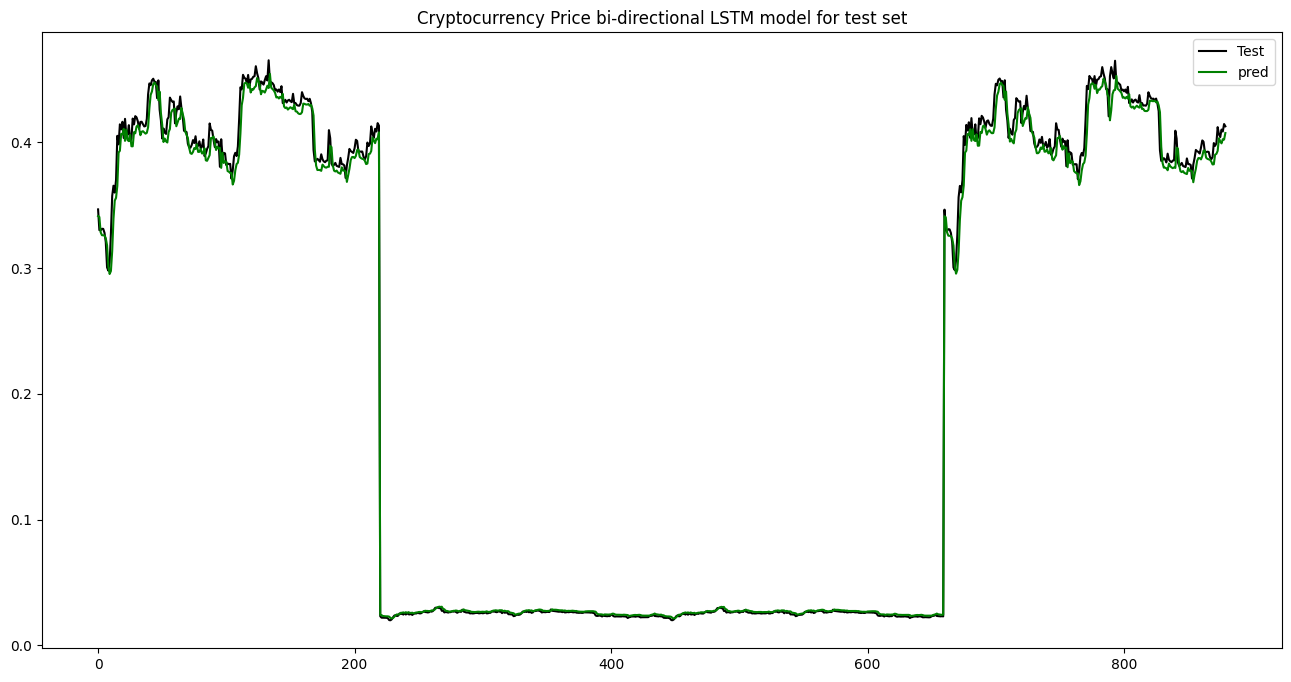

In [128]:
main_2(model2, "bi-directional LSTM")

28/28 [==============================] - 1s 38ms/step
[0.35001108] [0.34662545]
[0.34903687] [0.33013544]
[0.33616963] [0.32999718]
[0.33228153] [0.33121474]
[0.33310437] [0.33112945]
[0.3331927] [0.3280177]
[0.3310002] [0.32058334]
[0.32459155] [0.3005032]
[0.3081044] [0.29789842]
[0.30110845] [0.30449518]


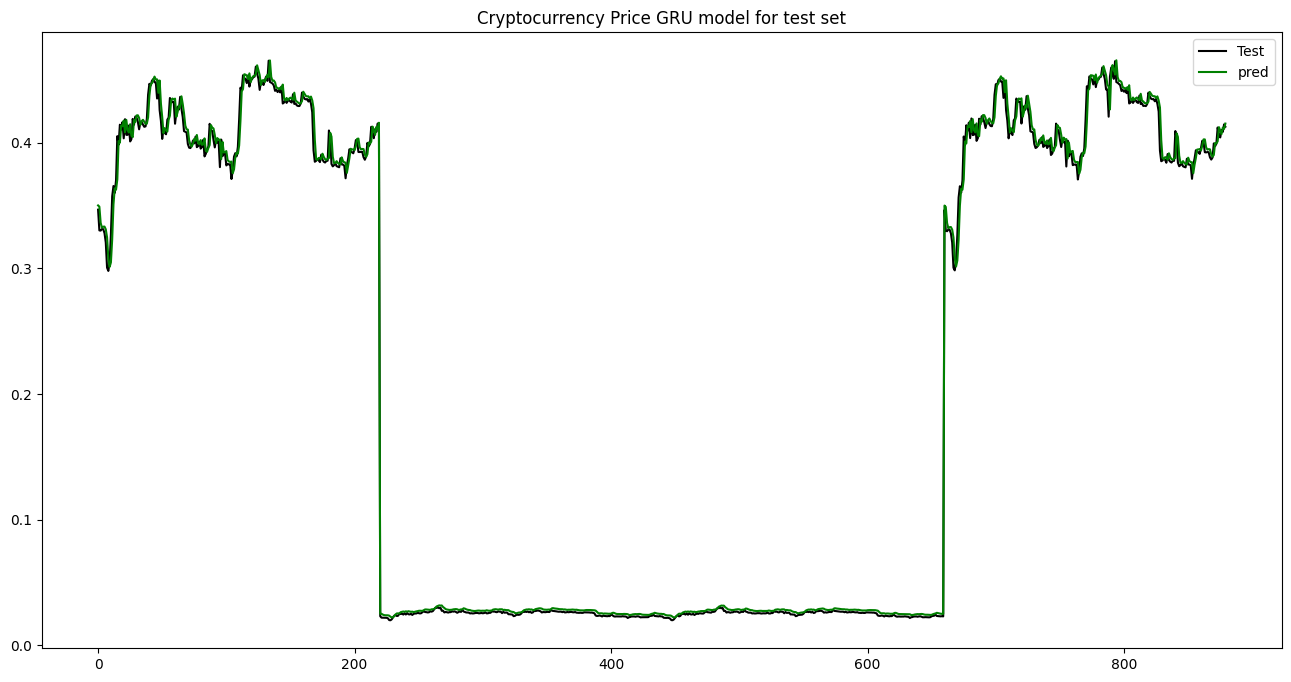

In [114]:
main_2(model3, "GRU")

Now let's plot each Cryptocurrencies with the 3 models.

7/7 [==============================] - 0s 31ms/step


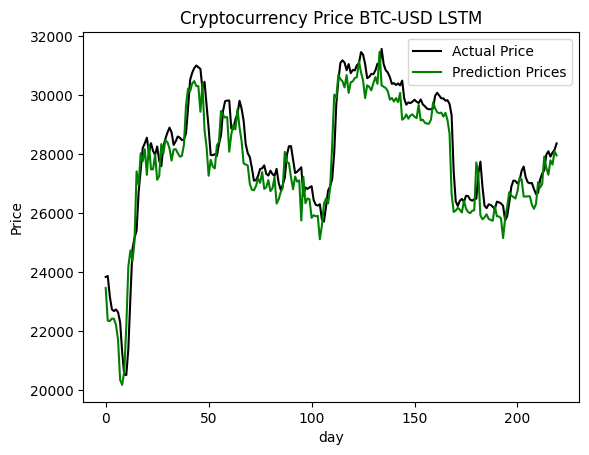

7/7 [==============================] - 0s 34ms/step


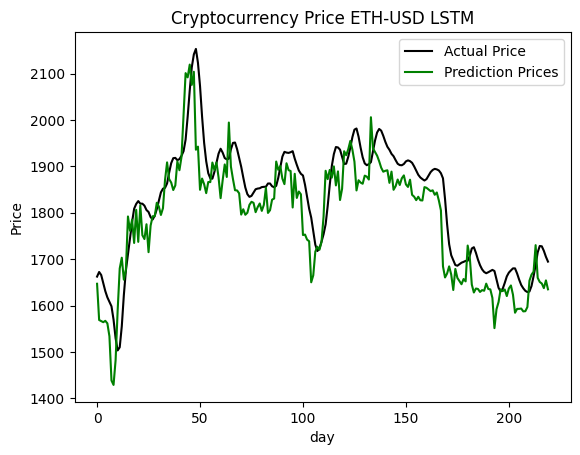

7/7 [==============================] - 0s 29ms/step


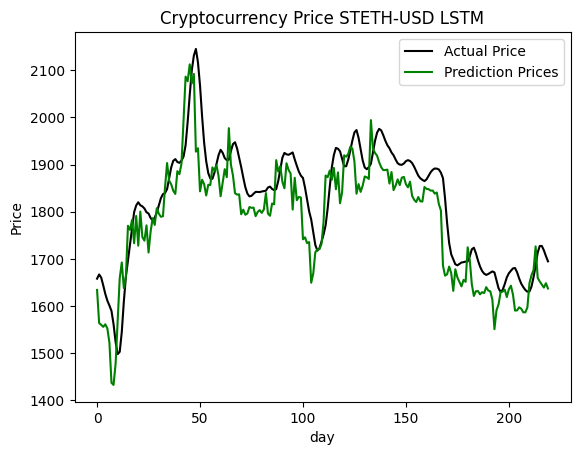

7/7 [==============================] - 0s 31ms/step


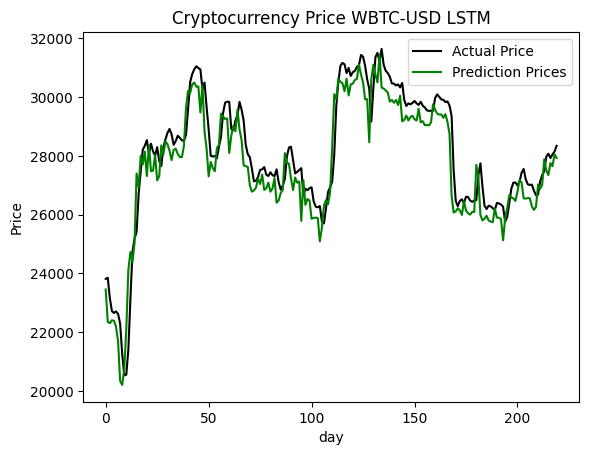

In [115]:
# LSTM model predictions.
main(model, "LSTM")

7/7 [==============================] - 0s 47ms/step


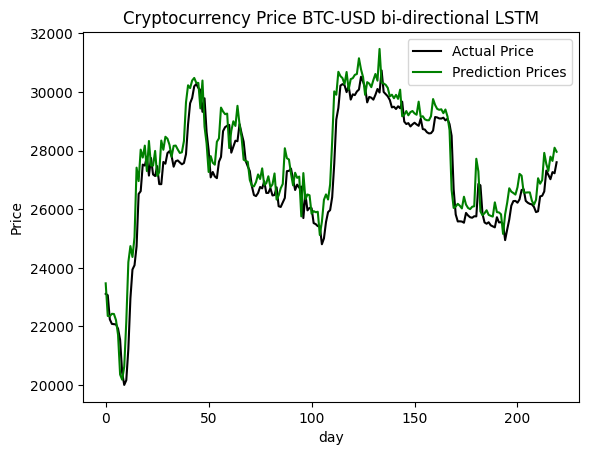

7/7 [==============================] - 0s 48ms/step


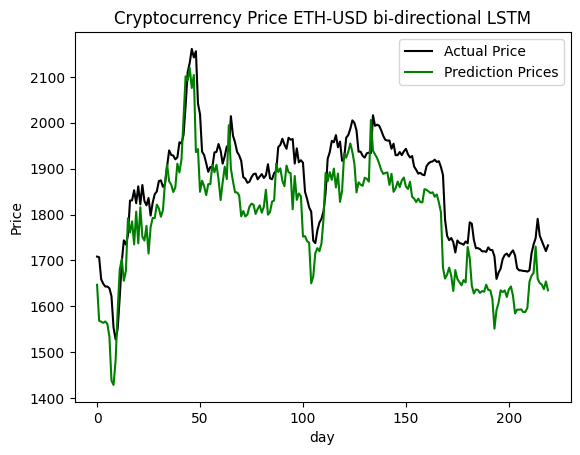

7/7 [==============================] - 0s 58ms/step


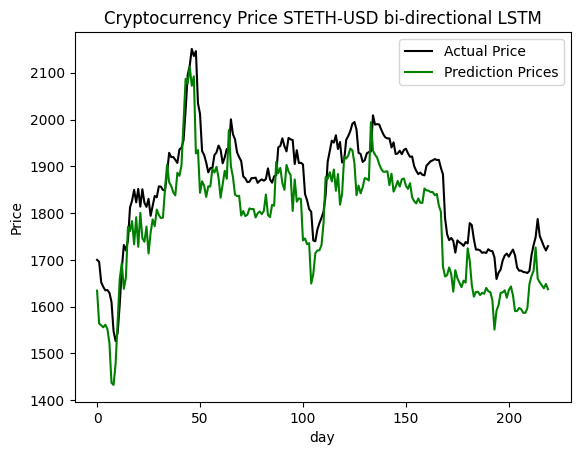

7/7 [==============================] - 0s 58ms/step


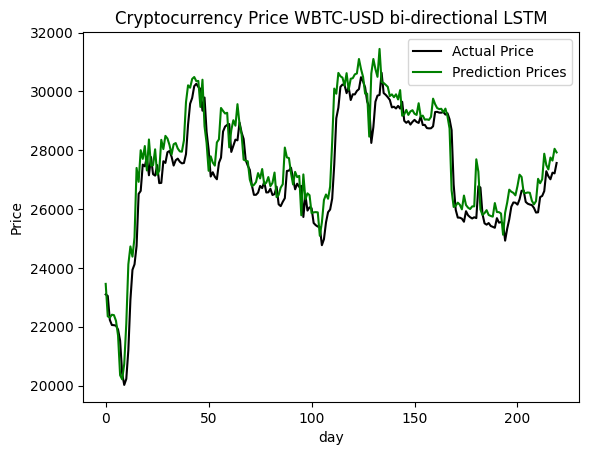

In [116]:
# bi-directional LSTM model predictions.
main(model2, "bi-directional LSTM")

7/7 [==============================] - 0s 43ms/step


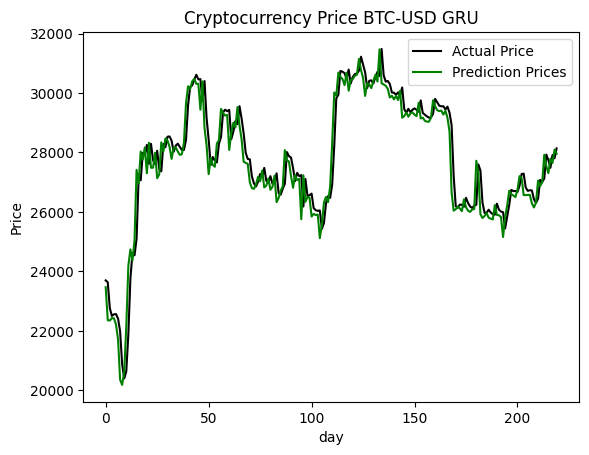

7/7 [==============================] - 0s 40ms/step


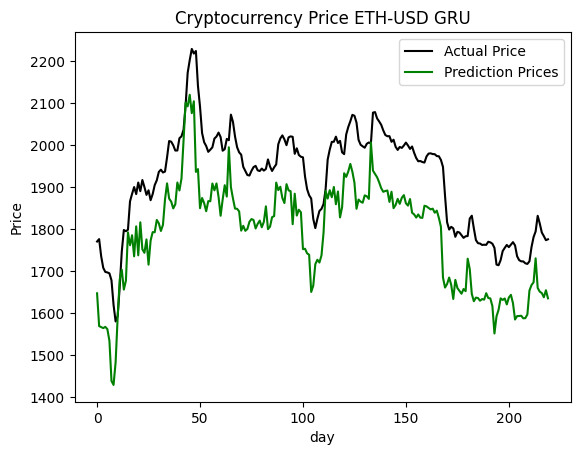

7/7 [==============================] - 0s 44ms/step


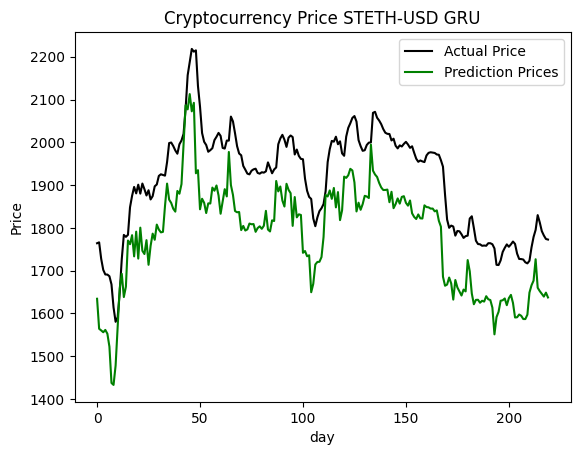

7/7 [==============================] - 0s 38ms/step


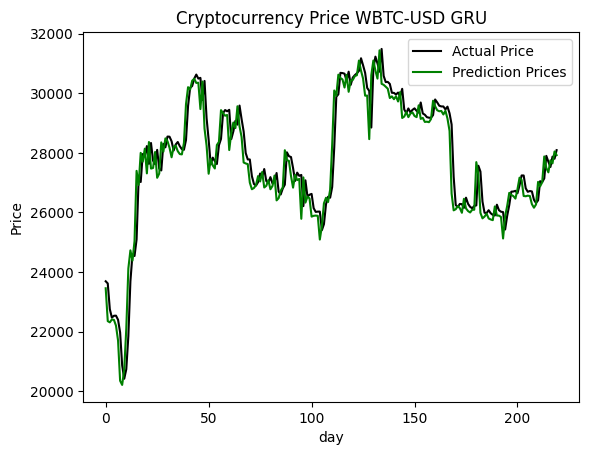

In [117]:
# GRU model predictions.
main(model3, "GRU")

In [118]:
# To predict x train and test sets for upcoming evaluation.
def predict_for_evaluation(MODEL):
    y_train_predict = MODEL.predict(x_train)
    y_test_predict = MODEL.predict(x_test)
    return y_train_predict, y_test_predict

### Explained variance score

The explained_variance_score computes the explained variance regression score.

If $\hat{Y}$ is the estimated target output, $Y$ the corresponding (correct) target output, and $Var$ is Variance, the square of the standard deviation, then the explained variance is estimated as follow:

\begin{align}
ExplainedVariance(Y, \hat{Y}) &= \dfrac{Var(Y - \hat{Y})}{Var(Y)}
\end{align}

The best possible score is $1.0$, lower values are worse.

In [119]:
# Calculate the explained variance regression.
def Explained_Variance_Score(y_train_predict, y_test_predict, model_name):
    print(f'-------------------------{model_name}----------------------------')
    print("Train data explained variance regression score:", explained_variance_score(y_train, y_train_predict))
    print("Test data explained variance regression score:", explained_variance_score(y_test, y_test_predict))

In [120]:
# Calculate the explained variance regression for LSTM model.
y_train_predict, y_test_predict = predict_for_evaluation(model)
Explained_Variance_Score(y_train_predict, y_test_predict, model_name="LSTM")

28/28 [==============================] - 1s 31ms/step
-------------------------LSTM----------------------------
Train data explained variance regression score: 0.9975353437266348
Test data explained variance regression score: 0.9985399458361818


In [121]:
# Calculate the explained variance regression for bi-directional LSTM model.
y_train_predict, y_test_predict = predict_for_evaluation(model2)
Explained_Variance_Score(y_train_predict, y_test_predict, model_name="bi-directional LSTM")

28/28 [==============================] - 1s 48ms/step
-------------------------bi-directional LSTM----------------------------
Train data explained variance regression score: 0.9970711004992127
Test data explained variance regression score: 0.9984673320849949


In [122]:
# Calculate the explained variance regression for GRU model.
y_train_predict, y_test_predict = predict_for_evaluation(model3)
Explained_Variance_Score(y_train_predict, y_test_predict, model_name="GRU")

28/28 [==============================] - 1s 46ms/step
-------------------------GRU----------------------------
Train data explained variance regression score: 0.9977644269578444
Test data explained variance regression score: 0.998913682241369


### R² score

The r2_score function computes the coefficient of determination, usually denoted as $R^2$.

It represents the proportion of variance (of $Y$) that has been explained by the independent variables in the model. It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, through the proportion of explained variance.

As such variance is dataset dependent, $R^2$ may not be meaningfully comparable across different datasets. Best possible score is $1.0$ and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected (average) value of $Y$, disregarding the input features, would get an $R^2$ score of $0.0$.

When the prediction residuals have zero mean, the $R^2$ score and the Explained variance score are identical.

If $\hat{Y_{i}}$ is the predicted value of the $i$-th sample and $Y_{i}$ is the corresponding true value for total $n$ samples, the estimated $R^2$ is defined as:

\begin{align}
R^2(Y, \hat{Y}) &= 1 - \dfrac{\sum \limits _{i=1} ^{n} (Y_{i} - \hat{Y}_{i})^2}{\sum \limits _{i=1} ^{n} (Y_{i} - \hat{Y})^2}
\end{align}

where $\hat{Y} = \dfrac{1}{n} \sum \limits _{i=1} ^{n} Y_{i}$   and   $\sum \limits _{i=1} ^{n} (Y_{i} - \hat{Y}_{i})^2 = \sum \limits _{i=1} ^{n} \in_{i}^2$

The r2_score calculates unadjusted $R^2$ without correcting for bias in sample variance of $Y$.

In [123]:
# Calculate the R² score.
def R2_Score(y_train_predict, y_test_predict, model_name):
    print(f'-------------------------{model_name}----------------------------')
    print("Train data R2 score:", r2_score(y_train, y_train_predict))
    print("Test data R2 score:", r2_score(y_test, y_test_predict))

In [124]:
# Calculate the R² score for LSTM model.
y_train_predict, y_test_predict = predict_for_evaluation(model)
R2_Score(y_train_predict, y_test_predict, model_name="LSTM")

28/28 [==============================] - 1s 34ms/step
-------------------------LSTM----------------------------
Train data R2 score: 0.9975197650462739
Test data R2 score: 0.9982687926814381


In [125]:
# Calculate the R² score for LSTM model.
y_train_predict, y_test_predict = predict_for_evaluation(model2)
R2_Score(y_train_predict, y_test_predict, model_name="bi-directional LSTM")

28/28 [==============================] - 2s 56ms/step
-------------------------bi-directional LSTM----------------------------
Train data R2 score: 0.9969352457985149
Test data R2 score: 0.9982751276590156


In [126]:
# Calculate the R² score for LSTM model.
y_train_predict, y_test_predict = predict_for_evaluation(model3)
R2_Score(y_train_predict, y_test_predict, model_name="GRU")

28/28 [==============================] - 1s 47ms/step
-------------------------GRU----------------------------
Train data R2 score: 0.9977327587993046
Test data R2 score: 0.9988281225696578


The difference between the explained variance score and the $R^2$ score, the coefficient of determination is that when the explained variance score does not account for systematic offset in the prediction. For this reason, the $R^2$ score, the coefficient of determination should be preferred in general.

### Regression analysis
Regression analysis is a technique we can use to understand the relationship between one or more predictor variables and a response variable.
There are many way to assess how well a regression model fits a dataset, here is some of them:

1.   **Root Mean Square Error(RMSE) :** Statistically, rmse is the square of the mean square, which is the arithmetic mean of the square of group value. Root mean square is also known as quadratic mean and is a specific situation of generalized mean whose exponent is 2. Root mean square isdefined as a varying function that relies on an integral of the square of the value which is immediate in a  cycle.
In other words, the root mean square of a group of a number is the square of the arithmetic mean or the squares of the functions which defines the constant waveform.

\begin{align}
RMSE &= \sqrt{\dfrac{1}{n} \sum \limits _{t=1} ^{n} (Y_{t} - F_{t})^2}
\end{align}

2.   **Mean Absolute Error (MAE) :** is a metric used to evaluate the performance of a regression model. It is defined as the average absolute difference between the predicted values of the model and the true values of the data.

\begin{align}
MAE &= \dfrac{1}{n} \sum \limits _{t=1} ^{n} |Y_{t} - F_{t}|
\end{align}

3.   **Mean Absolute Percentage Error (MAPE) :** is a metric that defines the accuracy of a forecasting method. It represents the average of the absolute percentage errors of each entry in a dataset to calculate how accurate the forecasted quantities were in comparison with the actual quantities. MAPE is often effective for analyzing large sets of data and requires the use of dataset values other than zero.

\begin{align}
MAPE &= (\dfrac{1}{n} \sum \limits _{t=1} ^{n} |\dfrac{Y_{t} - F_{t}}{Y_{t}}|) * 100\%
\end{align}

In [129]:
# Evaluation metrices MAE, RMSE and MAPE on train and test sets.
def metrices(y_train_predict, y_test_predict, model_name):
    print(f'------------------------------{model_name}---------------------------------')
    print("Train data RMSE: ", math.sqrt(mean_squared_error(y_train,y_train_predict)))
    print("Train data MAPE: ", mean_absolute_percentage_error(y_train,y_train_predict))
    print("Train data MAE: ", mean_absolute_error(y_train,y_train_predict))
    print("-------------------------------------------------------------------------------------")
    print("Test data RMSE: ", math.sqrt(mean_squared_error(y_test,y_test_predict)))
    print("Test data MAPE: ", mean_absolute_percentage_error(y_test,y_test_predict))
    print("Test data MAE: ", mean_absolute_error(y_test,y_test_predict))

In [130]:
# Evaluation metrices MAE, RMSE and MAPE for LSTM model.
y_train_predict, y_test_predict = predict_for_evaluation(model)
metrices(y_train_predict, y_test_predict, model_name="LSTM")

28/28 [==============================] - 1s 34ms/step
------------------------------LSTM---------------------------------
Train data RMSE:  0.011633752499451954
Train data MAPE:  623181076.6724627
Train data MAE:  0.0055330875027332005
-------------------------------------------------------------------------------------
Test data RMSE:  0.008028401543315994
Test data MAPE:  0.027673037084942217
Test data MAE:  0.004894334310716369


In [131]:
# Evaluation metrices MAE, RMSE and MAPE for bi-directional LSTM model.
y_train_predict, y_test_predict = predict_for_evaluation(model2)
metrices(y_train_predict, y_test_predict, model_name="bi-directional LSTM")

28/28 [==============================] - 1s 47ms/step
------------------------------bi-directional LSTM---------------------------------
Train data RMSE:  0.012932164876306176
Train data MAPE:  1277217705.8853881
Train data MAE:  0.006314341769737825
-------------------------------------------------------------------------------------
Test data RMSE:  0.008013698983984236
Test data MAPE:  0.03244670022919525
Test data MAE:  0.004840609092058414


In [132]:
# Evaluation metrices MAE, RMSE and MAPE for GRU model.
y_train_predict, y_test_predict = predict_for_evaluation(model3)
metrices(y_train_predict, y_test_predict, model_name="GRU")

28/28 [==============================] - 1s 38ms/step
------------------------------GRU---------------------------------
Train data RMSE:  0.01112300854636666
Train data MAPE:  1324497166.629345
Train data MAE:  0.005541438378085653
-------------------------------------------------------------------------------------
Test data RMSE:  0.006605347055887298
Test data MAPE:  0.04651687232663032
Test data MAE:  0.004171745108073671


In [137]:
# Function to Calculate RMSE, MAPE and MAE for each Cryptocurrencies and count the Average with the chosen model.
def Model_Evaluation(MODEL, String):
    BTC_predict = MODEL.predict(x_BTC_USD_test)
    ETH_predict = MODEL.predict(x_ETH_USD_test)
    STETH_predict = MODEL.predict(x_STETH_USD_test)
    WBTC_predict = MODEL.predict(x_WBTC_USD_test)
    Average_MAE = 0.0
    Average_RMSE = 0.0
    Average_MAPE = 0.0
    print(f'-----------------------------------------------------{String}----------------------------------------------------')
    print(f'-------------------------RMSE---------------------------------MAPE---------------------------------MAE-------------')
    RMSE, MAPE, MAE = math.sqrt(mean_squared_error(y_BTC_USD_test,BTC_predict)), mean_absolute_percentage_error(y_BTC_USD_test,BTC_predict), mean_absolute_error(y_BTC_USD_test,BTC_predict)
    Average_MAPE = Average_MAPE + MAPE
    Average_RMSE = Average_RMSE + RMSE
    Average_MAE = Average_MAE + MAE
    print(f'BTC-USD-----------{RMSE}----------------{MAPE}-------------------{MAE}')
    RMSE, MAPE, MAE = math.sqrt(mean_squared_error(y_ETH_USD_test,ETH_predict)), mean_absolute_percentage_error(y_ETH_USD_test,ETH_predict), mean_absolute_error(y_ETH_USD_test,ETH_predict)
    Average_MAPE = Average_MAPE + MAPE
    Average_RMSE = Average_RMSE + RMSE
    Average_MAE = Average_MAE + MAE
    print(f'ETH-USD-----------{RMSE}---------------{MAPE}-------------------{MAE}')
    RMSE, MAPE, MAE = math.sqrt(mean_squared_error(y_STETH_USD_test,STETH_predict)), mean_absolute_percentage_error(y_STETH_USD_test,STETH_predict), mean_absolute_error(y_STETH_USD_test,STETH_predict)
    Average_MAPE = Average_MAPE + MAPE
    Average_RMSE = Average_RMSE + RMSE
    Average_MAE = Average_MAE + MAE
    print(f'STETH-USD---------{RMSE}---------------{MAPE}------------------{MAE}')
    RMSE, MAPE, MAE = math.sqrt(mean_squared_error(y_WBTC_USD_test,WBTC_predict)), mean_absolute_percentage_error(y_WBTC_USD_test,WBTC_predict), mean_absolute_error(y_WBTC_USD_test,WBTC_predict)
    Average_MAPE = Average_MAPE + MAPE
    Average_RMSE = Average_RMSE + RMSE
    Average_MAE = Average_MAE + MAE
    print(f'WBTC-USD----------{RMSE}----------------{MAPE}-------------------{MAE}')
    print(f'Average =---------{Average_RMSE / 4}----------------{Average_MAPE / 4}-------------------{Average_MAE / 4}')
    Average = Average_RMSE + Average_MAPE + Average_MAE

In [138]:
# Calculate RMSE, MAPE and MAE for each Cryptocurrencies using LSTM model.
Model_Evaluation(model, "LSTM")

7/7 [==============================] - 0s 33ms/step
-----------------------------------------------------LSTM----------------------------------------------------
-------------------------RMSE---------------------------------MAPE---------------------------------MAE-------------
BTC-USD-----------0.011132248159308179----------------0.021887305865094697-------------------0.008786256313442025
ETH-USD-----------0.0010120266229827143---------------0.03291182468753784-------------------0.0008189604487102267
STETH-USD---------0.001007878303999239---------------0.0331647999843696------------------0.000823050950591163
WBTC-USD----------0.01148276719495499----------------0.02272820923034187-------------------0.009149068801997139
Average =---------0.0061587300703112805----------------0.027673034941836-------------------0.004894334128685139


In [139]:
# Calculate RMSE, MAPE and MAE for each Cryptocurrencies using bi-directional LSTM model.
Model_Evaluation(model2, "bi-directional LSTM")

7/7 [==============================] - 0s 58ms/step
-----------------------------------------------------bi-directional LSTM----------------------------------------------------
-------------------------RMSE---------------------------------MAPE---------------------------------MAE-------------
BTC-USD-----------0.011031853161307966----------------0.020975588061407896-------------------0.008515190260288488
ETH-USD-----------0.0012017251284303606---------------0.04382823188850113-------------------0.001084714466724252
STETH-USD---------0.0011886165824117547---------------0.04364527474064472------------------0.0010774367585883317
WBTC-USD----------0.011502989156091839----------------0.021337712057267737-------------------0.008685095399093287
Average =---------0.00623129600706048----------------0.03244670168695537-------------------0.004840609221173589


In [140]:
# Calculate RMSE, MAPE and MAE for each Cryptocurrencies using GRU model.
Model_Evaluation(model3, "GRU")

7/7 [==============================] - 0s 40ms/step
-----------------------------------------------------GRU----------------------------------------------------
-------------------------RMSE---------------------------------MAPE---------------------------------MAE-------------
BTC-USD-----------0.008985289903516065----------------0.015798271720136182-------------------0.006325986705820661
ETH-USD-----------0.002016237230047037---------------0.07685231975605479-------------------0.001915880058926001
STETH-USD---------0.0020127195818422394---------------0.07716593288981563------------------0.0019176462742677067
WBTC-USD----------0.009255849537092126----------------0.01625097059582469-------------------0.006527467664210517
Average =---------0.005567524063124367----------------0.04651687374045783-------------------0.004171745175806221


## Conclusion

We have proposed simple three layers deep networks architecture to be used and compared among three popular RNNs, namely the long short-term memory (LSTM), the bidirectional LSTM (Bi-LSTM), and the gated recurrent unit (GRU)

We used a multivariate prediction model approach on four major cryptocurrencies against USD while performing a robust evaluation by running the proposed networks architecture 300 times.

We found that both Bi-LSTM and LSTM have similar performance results in averaged MAE and RMSE from the experimental results. 

GRU could get better results for USDT-USD and WBTC-USD, but it also has greater variation than Bi-LSTM and GRU. 

Moreover, LSTM and GRU have similar results in terms of execution time, where GRU is slightly better and has lower variation results on average.

## **Reference**
<h3>Some of the resource and people help us to do the exam:</h3>


<font color='black'>
<ul>
<li> <b>Global Crypto Currency Price Database</b> at <a href="https://www.kaggle.com/datasets/lasaljaywardena/global-cryptocurrency-price-database/?select=data"> Kaggle</a> </li>
    
<li> <b>Forecasting cryptocurrency prices using Recurrent Neural Network and Long Short-term Memory</b> at <a href="https://www.kaggle.com/code/hendlabib12/project">ScienceDirect</a></li>

<li> <b>Multivariate cryptocurrency prediction: comparative analysis of three recurrent neural networks approaches</b> at <a href="https://journalofbigdata.springeropen.com/articles/10.1186/s40537-022-00601-7">Springer Open</a></li>

<li> <b>Bitcoin price Prediction using LSTM</b> at <a href="https://github.com/meetttttt/Bitcoin-Price-Prediction/blob/main/bitcoin-price-prediction-using-lstm.ipynb"> github</a></li>

<li> <b>Explained variance score</b> at <a href="https://scikit-learn.org/stable/modules/model_evaluation.html#explained-variance-score">scikit learn</a></li>

<li> <b> R² score, the coefficient of determination</b> at <a href="https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score"> scikit learn</a></li>

<li> <b>MinMaxScaler</b> at <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html"> scikit learn</a></li>

<li> <b>Introduction to Recurrent Neural Network</b> at <a href="https://www.geeksforgeeks.org/introduction-to-recurrent-neural-network/"> geeks for geeks</a></li>

<li> <b>Neural Networks</b> at <a href="https://www.geeksforgeeks.org/neural-networks-a-beginners-guide/"> geeks for geeks</a></li>
    
<li> <b>Bidirectional LSTM in NLP</b> at <a href="https://www.geeksforgeeks.org/bidirectional-lstm-in-nlp/"> geeks for geeks</a></li>

<li> <b>Illustrated Guide to LSTM’s and GRU’s: A step by step explanation</b> at <a href="https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21
"> towards data science</a></li>    
    
<li> <b>Understanding of LSTM Networks</b> at <a href="https://www.geeksforgeeks.org/understanding-of-lstm-networks/"> geeks for geeks</a></li>    
    
<li> <b>Mean absolute error (MAE)</b> at <a href="https://computersciencewiki.org/index.php/Mean_absolute_error_(MAE)"> computer science wiki</a></li>
    
<li> <b>What Is MAPE? A Guide to Mean Absolute Percentage Error</b> at <a href="https://www.indeed.com/career-advice/career-development/what-is-mape"> indeed</a></li>    
    
<li> <b>181 - Multivariate time series forecasting using LSTM</b> at <a href="https://youtu.be/tepxdcepTbY?feature=shared"> YouTube</a></li>    
    
<li> <b>Predicting Crypto Prices in Python</b> at <a href="https://youtu.be/GFSiL6zEZF0?feature=shared"> YouTube</a></li>    
    
<li> <b>Recurrent Neural Networks | LSTM Price Movement Predictions For Trading Algorithms</b> at <a href="https://youtu.be/hpfQE0bTeA4?feature=shared"> YouTube</a></li>  
    
<li> <b>LSTM Top Mistake In Price Movement Predictions For Trading</b> at <a href="https://youtu.be/lhrCz6t7rmQ?feature=shared"> YouTube</a></li>    
    
    
</ul>
</font>